# A Story About the Nigerian Health System

In this Data Analysis Project, I intend to make a story of the Nigerian Health System using the NMIS Dataset about it available from Nigeria. My **intention** is to:

<br> **1.** To examine how the state of the Nigerian Health System.
<br>
<br> **2.** Compare the Health System current state to the expected Sustainable Development Goals(SDG).
<br>
<br> **3.** In case of the need for improvements, what and what exactly needs to be improved.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd

nig_nmis = pd.read_csv('NMIS_Health_Dataset.csv')
nig_nmis.head(10)

,maternal_health_delivery_services,facility_type_display,management,emergency_transport,skilled_birth_attendant,phcn_electricity,c_section_yn,child_health_measles_immun_calc,improved_water_supply,improved_sanitation,vaccines_fridge_freezer,antenatal_care_yn,family_planning_yn,malaria_treatment_artemisinin,num_chews_fulltime,num_nurses_fulltime,num_nursemidwives_fulltime,num_doctors_fulltime,latitude,longitude
0,True,Health Post,public,True,False,True,False,True,False,False,False,True,False,True,1.0,0.0,0.0,0.0,6.543408,9.084703
1,True,Primary Health Centre (PHC),private,True,True,True,False,True,False,True,True,True,False,True,4.0,1.0,1.0,1.0,9.007209,7.677808
2,True,Basic Health Centre / Primary Health Clinic,public,True,True,True,True,True,True,True,True,True,True,True,2.0,4.0,11.0,2.0,5.129700,7.159200
3,True,Primary Health Centre (PHC),public,False,False,False,False,True,True,False,False,True,True,True,2.0,0.0,0.0,0.0,5.463300,8.146400
4,True,Health Post,public,False,False,False,False,True,False,False,False,True,True,True,0.0,0.0,0.0,0.0,5.504000,8.025100
5,True,Health Post,private,True,True,False,True,False,True,True,False,True,True,True,0.0,2.0,0.0,1.0,5.076200,5.871500
6,False,Health Post,public,False,False,False,False,True,False,False,False,True,True,True,0.0,1.0,0.0,0.0,6.447500,9.049100
7,True,Specialist Hospital,private,True,True,True,True,True,True,True,True,True,True,True,1.0,6.0,12.0,5.0,5.546000,5.761100
8,True,Specialist Hospital,private,True,True,True,True,True,True,True,True,True,True,True,4.0,NaN,4.0,15.0,5.525800,5.765100
9,True,Health Post,private,False,False,False,False,False,True,True,False,False,False,True,1.0,0.0,0.0,0.0,10.285225,8.594392


In [3]:
#Sum of all Health Centers reported in Nigeria is 34139
total = len(nig_nmis)
print('We have a total number of {} Health Centers in Nigeria'.format(total))

new_names = {'Primary Health Center':'Primary Health Centre (PHC)','Basic Health Centre or Primary Health Clinic':'Basic Health Centre / Primary Health Clinic',
             'District Hospital / Comprehensive Health Centre':'District Hospital or Comprehensive Health Centre',"Information not available / Don't know":'Other'}
nig_nmis = nig_nmis.replace(new_names)

other_new_names = {'Basic Health Centre / Primary Health Clinic':'Primary Health Centre (PHC)','District / General Hospital':'District Hospital or Comprehensive Health Centre','Teaching / Specialist Hospital':'Teaching Hospital'}
nig_nmis = nig_nmis.replace(other_new_names)
more_new_names = {'District Hospital or Comprehensive Health Centre':'District Hospital','Primary Health Centre (PHC)':'Primary Health Centre','none':'Other'}
nig_nmis = nig_nmis.replace(more_new_names)
nig_nmis['facility_type_display'].value_counts()

We have a total number of 34139 Health Centers in Nigeria


Primary Health Centre    15962
Health Post               7540
Clinic                    4802
District Hospital         2121
Dispensary                1530
Teaching Hospital          711
Specialist Hospital        640
Other                      355
General Hospital           343
Private Facility            20
Name: facility_type_display, dtype: int64

In [53]:
nig_nmis.head(10)

,maternal_health_delivery_services,facility_type_display,management,emergency_transport,skilled_birth_attendant,phcn_electricity,c_section_yn,child_health_measles_immun_calc,improved_water_supply,improved_sanitation,vaccines_fridge_freezer,antenatal_care_yn,family_planning_yn,malaria_treatment_artemisinin,num_chews_fulltime,num_nurses_fulltime,num_nursemidwives_fulltime,num_doctors_fulltime,latitude,longitude
0,True,Health Post,public,True,False,True,False,True,False,False,False,True,False,True,1.0,0.0,0.0,0.0,6.543408,9.084703
1,True,Primary Health Centre,private,True,True,True,False,True,False,True,True,True,False,True,4.0,1.0,1.0,1.0,9.007209,7.677808
2,True,Primary Health Centre,public,True,True,True,True,True,True,True,True,True,True,True,2.0,4.0,11.0,2.0,5.129700,7.159200
3,True,Primary Health Centre,public,False,False,False,False,True,True,False,False,True,True,True,2.0,0.0,0.0,0.0,5.463300,8.146400
4,True,Health Post,public,False,False,False,False,True,False,False,False,True,True,True,0.0,0.0,0.0,0.0,5.504000,8.025100
5,True,Health Post,private,True,True,False,True,False,True,True,False,True,True,True,0.0,2.0,0.0,1.0,5.076200,5.871500
6,False,Health Post,public,False,False,False,False,True,False,False,False,True,True,True,0.0,1.0,0.0,0.0,6.447500,9.049100
7,True,Specialist Hospital,private,True,True,True,True,True,True,True,True,True,True,True,1.0,6.0,12.0,5.0,5.546000,5.761100
8,True,Specialist Hospital,private,True,True,True,True,True,True,True,True,True,True,True,4.0,NaN,4.0,15.0,5.525800,5.765100
9,True,Health Post,private,False,False,False,False,False,True,True,False,False,False,True,1.0,0.0,0.0,0.0,10.285225,8.594392


In [4]:
from shapely.geometry import Point, Polygon

geometry = [Point(xy) for xy in zip(nig_nmis['longitude'],nig_nmis['latitude'])]
geometry[:3]

In [5]:
nig_crs = {'init':'epsg:4326'}
geo_nig = gpd.GeoDataFrame(nig_nmis,crs=nig_crs,geometry=geometry)

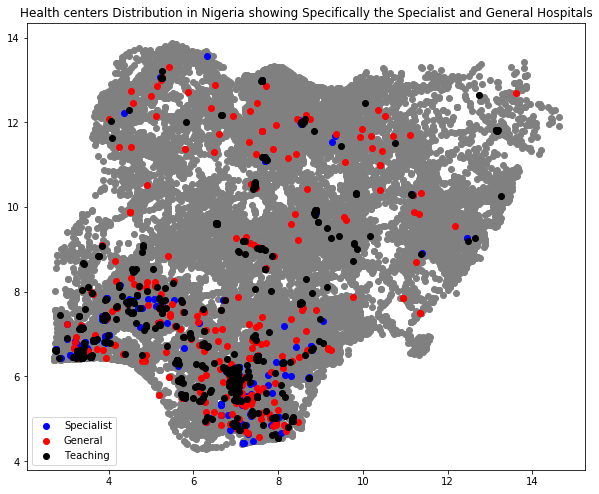

In [6]:
fig, ax = plt.subplots(figsize = (10,10))
geo_nig.plot(ax=ax, color = 'gray')

geo_nig[geo_nig['facility_type_display'] == 'Specialist Hospital'].plot(ax=ax,color='blue',label='Specialist')
geo_nig[geo_nig['facility_type_display'] == 'General Hospital'].plot(ax=ax,color='red',label='General')
geo_nig[geo_nig['facility_type_display'] == 'Teaching Hospital'].plot(ax=ax,color='black',label='Teaching')
plt.title('Health centers Distribution in Nigeria showing Specifically the Specialist and General Hospitals')
plt.legend()

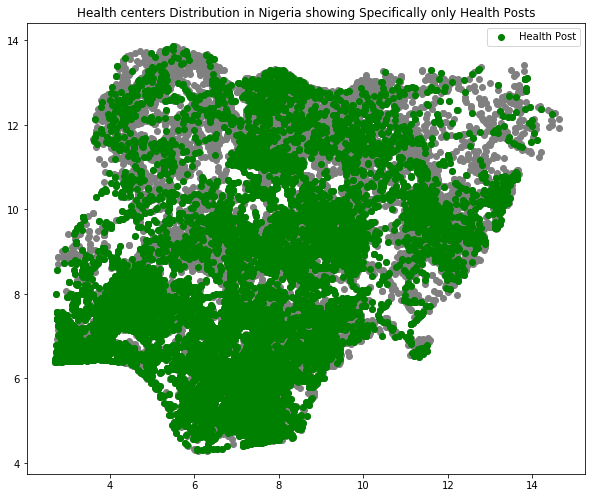

In [7]:
fig, ax = plt.subplots(figsize = (10,10))
geo_nig.plot(ax=ax, color = 'gray')

geo_nig[geo_nig['facility_type_display'] == 'Primary Health Centre'].plot(ax=ax,color='green',label='Health Post')
plt.title('Health centers Distribution in Nigeria showing Specifically only Health Posts')
plt.legend()

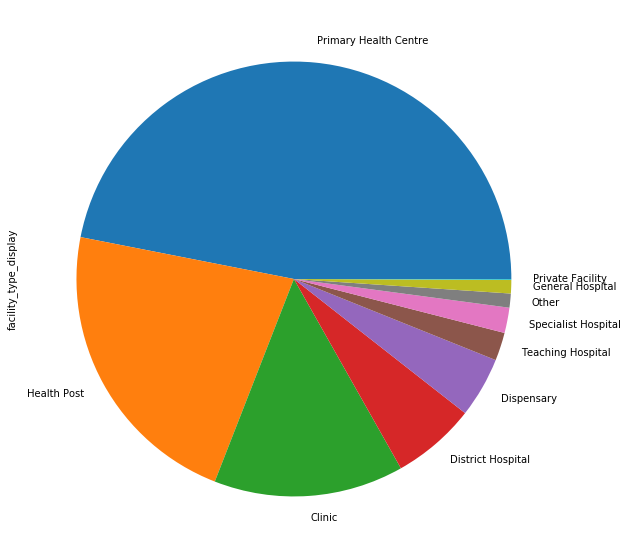

In [8]:
nig_nmis['facility_type_display'].value_counts().plot(kind='pie',figsize=(10,10))

In [9]:
#Lets Divide the Health Centres to Major and Minor

def divider(row):
    if row['facility_type_display'] == 'Teaching Hospital':
        return 'Major'
    if row['facility_type_display'] == 'Specialist Hospital':
        return 'Major'
    if row['facility_type_display'] == 'General Hospital':
        return 'Major'
    if row['facility_type_display'] == 'District Hospital':
        return 'Major'
    else:
        return 'Minor'
    
    
nig_nmis['Category'] = nig_nmis.apply(lambda row: divider(row), axis=1)

nig_nmis.head(10)

,maternal_health_delivery_services,facility_type_display,management,emergency_transport,skilled_birth_attendant,phcn_electricity,c_section_yn,child_health_measles_immun_calc,improved_water_supply,improved_sanitation,...,family_planning_yn,malaria_treatment_artemisinin,num_chews_fulltime,num_nurses_fulltime,num_nursemidwives_fulltime,num_doctors_fulltime,latitude,longitude,geometry,Category
0,True,Health Post,public,True,False,True,False,True,False,False,...,False,True,1.0,0.0,0.0,0.0,6.543408,9.084703,POINT (9.08470312 6.54340807),Minor
1,True,Primary Health Centre,private,True,True,True,False,True,False,True,...,False,True,4.0,1.0,1.0,1.0,9.007209,7.677808,POINT (7.67780798 9.007208609999999),Minor
2,True,Primary Health Centre,public,True,True,True,True,True,True,True,...,True,True,2.0,4.0,11.0,2.0,5.129700,7.159200,POINT (7.1592 5.1297),Minor
3,True,Primary Health Centre,public,False,False,False,False,True,True,False,...,True,True,2.0,0.0,0.0,0.0,5.463300,8.146400,POINT (8.1464 5.4633),Minor
4,True,Health Post,public,False,False,False,False,True,False,False,...,True,True,0.0,0.0,0.0,0.0,5.504000,8.025100,POINT (8.0251 5.504),Minor
5,True,Health Post,private,True,True,False,True,False,True,True,...,True,True,0.0,2.0,0.0,1.0,5.076200,5.871500,POINT (5.8715 5.0762),Minor
6,False,Health Post,public,False,False,False,False,True,False,False,...,True,True,0.0,1.0,0.0,0.0,6.447500,9.049100,POINT (9.049099999999999 6.4475),Minor
7,True,Specialist Hospital,private,True,True,True,True,True,True,True,...,True,True,1.0,6.0,12.0,5.0,5.546000,5.761100,POINT (5.7611 5.546),Major
8,True,Specialist Hospital,private,True,True,True,True,True,True,True,...,True,True,4.0,NaN,4.0,15.0,5.525800,5.765100,POINT (5.7651 5.5258),Major
9,True,Health Post,private,False,False,False,False,False,True,True,...,False,True,1.0,0.0,0.0,0.0,10.285225,8.594392,POINT (8.594391870000001 10.28522539),Minor


In [10]:
nig_nmis['Category'].value_counts(normalize=True)

Minor    0.888251
Major    0.111749
Name: Category, dtype: float64

# Observations from Facility Type and Emergency Services

<br> **1.** Our first Observations is that the distribution of Specialist Hospitals seems to skewed and in favour of the South-west and South-East. We observe that Two-thirds of the Health Centers are located in the South.

<br> **2.** We also notice that we have a lot more Health Post in the Southern Part of Nigeria than the North.

<br> **3.** Of the total 34139 Health Centers in Nigeria, only 11% are major Health centers. Major health centers being Specialist, Teaching, General and District hospitals. 50% of the health centres which lead the list are Primary Health Centres

<br> **4.** Out of the 11% of the Major Health Centres only 69% have **Emergency Transport** available. Out of the Total Health Centres in Nigeria, only 68.4% have Emergency Services

<br> **5.** Out of the 34139 Health Centers in Nigeria, we have only 343 General Hospitals out of which only 74% have emergency services.

# Emergency Services(Transport)

In [11]:
#print(nig_nmis['emergency_transport'].value_counts(normalize=True))

emergency = nig_nmis[nig_nmis['Category'] == 'Major']

print(emergency['emergency_transport'].value_counts(normalize=True))

True     0.689646
False    0.310354
Name: emergency_transport, dtype: float64


In [12]:
#Lets check if all of our General Hospitals have Emergency Transport

general = nig_nmis[nig_nmis['facility_type_display'] == 'General Hospital']

print(general['emergency_transport'].value_counts(normalize=True))

True     0.74344
False    0.25656
Name: emergency_transport, dtype: float64


In [13]:
nig_nmis['emergency_transport'].value_counts(normalize=True)

False    0.684584
True     0.315416
Name: emergency_transport, dtype: float64

# Availability of Doctors,Nurses and Mid_Wives

In considering the Emergency Status of an Health Center it is also important to consider the Availabilty of Full_time of Doctors and How many.

In [16]:
#Number of Doctors on Full_time

nig_nmis['num_doctors_fulltime'].value_counts().iloc[:10]

0.0    23899
1.0     4842
2.0     1721
3.0      665
4.0      315
5.0      166
6.0       97
7.0       51
8.0       35
9.0       27
Name: num_doctors_fulltime, dtype: int64

In [17]:
#First lets remove those without Doctors
with_doctors = nig_nmis.drop(nig_nmis[nig_nmis['num_doctors_fulltime'] == 0.0].index)
without_doctors = nig_nmis[nig_nmis['num_doctors_fulltime'] == 0.0]
with_doctors = without_doctors[without_doctors['num_doctors_fulltime'].notnull()]
#without_doctors.head(10)

# Understanding How Comprehensive the Minor Health Care Centers

Since Majority of our Health Care centers are Minor Health Care Centers like Primary Health Care Centers, dispensary etc. We want to understand how comprehensive this Health Care Centres are.

In [18]:
minors = nig_nmis[nig_nmis['Category'] == 'Minor']

without_doctors_not_minor = nig_nmis[nig_nmis['num_doctors_fulltime'] == 0.0]
lenght_without_doctors_not_minor = len(without_doctors_not_minor)
print('lenght_without_doctors_not_minor:{}'.format(lenght_without_doctors_not_minor))

without_doctors = minors[minors['num_doctors_fulltime'] == 0.0]
lenght_without_doctors = len(without_doctors)
print('lenght_without_doctors:{}'.format(lenght_without_doctors))

difference = lenght_without_doctors_not_minor - lenght_without_doctors
print('difference is {}'.format(difference))
percentage_difference = (difference/total)*100
print('Percentage_difference is:{}'.format(percentage_difference))

without_doctors_and_nurses = without_doctors[without_doctors['num_nurses_fulltime'] == 0.0]

length_of_without_doctors_and_nurses = len(without_doctors_and_nurses)
print(length_of_without_doctors_and_nurses)
percentage = (length_of_without_doctors_and_nurses/total)*100
print(percentage)

without_doctors_and_nurses_and_midwives = without_doctors_and_nurses[without_doctors_and_nurses[
    'num_nursemidwives_fulltime'] == 0.0]

length_of_without_doctors_and_nurses_and_midwives = len(without_doctors_and_nurses_and_midwives)
print(length_of_without_doctors_and_nurses_and_midwives)
percentage1 = (length_of_without_doctors_and_nurses_and_midwives/total)*100
print(percentage1)

lenght_without_doctors_not_minor:23899
lenght_without_doctors:23517
difference is 382
Percentage_difference is:1.118954861009403
20309
59.48914730952869
17202
50.388119159905095


# Observations from Doctor Availability

**1.** We have 23,899 Health Centers that have no Doctors on Full_time, which is about 74.7% of the Total Health Centers.

<br> **2.** We have 382 Major Health Centers like General, Specialist, Teaching Hospitals without Doctors on Full_time, which is about 1.12%.

<br> **3.** We have 20,309 Minor Health Centers without Doctors and Nurses on Full_time, which is about 59.48% of the total Health Centers.

<br> **4.** We have 17,202 Minor Health Centers without Doctors and Nurses and Mid_Wives on Full_time, which is about 50.38% of the total Health Centers.

# Improved Water Supply

In [26]:
nig_nmis['improved_water_supply'].value_counts(normalize=True)

False    0.53118
True     0.46882
Name: improved_water_supply, dtype: float64

In [27]:
major = nig_nmis[nig_nmis['Category'] == 'Major']

major_without_improved_water = major[major['improved_water_supply'] == False]
lenght_major_without_improved_water = len(major_without_improved_water)
print(lenght_major_without_improved_water)

524


# Observations for Improved Water Supply

**1.** We have 15784 Health Care Centers which is about 53.1% of the total health Centers in Nigeria. This means about 1 out of 2 health centers do not have access to improved Water Supply.

**2.** We have 524 Major (Specialist,General,teaching and District)  Health Care Centers without improved water Supply.

# Management

In [24]:
nig_nmis['management'].value_counts()

public         24763
private         4189
faith_based      249
dk               184
Name: management, dtype: int64

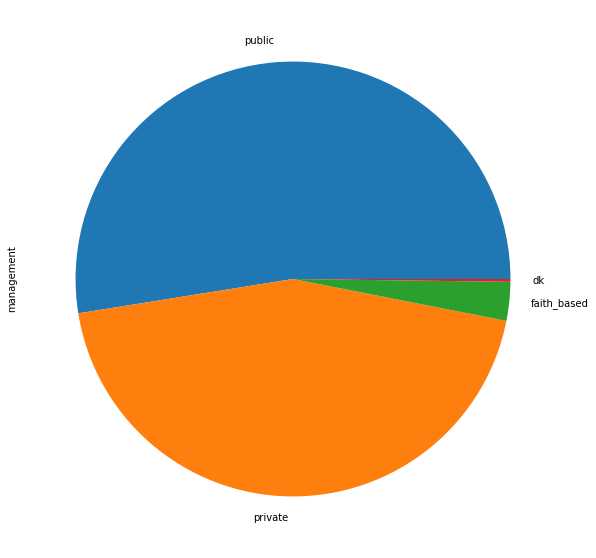

In [71]:
major['management'].value_counts().plot(kind='pie',figsize=(10,10))

Who runs our Major Health Centers?

In [22]:
major = nig_nmis[nig_nmis['Category'] == 'Major']
print(len(major))


major['management'].value_counts(normalize=True)

3815


public         0.525240
private        0.443888
faith_based    0.028786
dk             0.002086
Name: management, dtype: float64

In [30]:
print(len(minors))
minors['management'].value_counts(normalize=True)

30324


public         0.870906
private        0.115792
faith_based    0.006670
dk             0.006633
Name: management, dtype: float64

In [32]:
#Lets Consider how Private Health perform compared to Public Health Centers.

private = nig_nmis[nig_nmis['management'] == 'private']
public = nig_nmis[nig_nmis['management'] == 'public']


private['emergency_transport'].value_counts(normalize=True)


True     0.606589
False    0.393411
Name: emergency_transport, dtype: float64

In [33]:
public['emergency_transport'].value_counts(normalize=True)

False    0.76372
True     0.23628
Name: emergency_transport, dtype: float64

In [34]:
public['improved_sanitation'].value_counts(normalize=True)

False    0.54225
True     0.45775
Name: improved_sanitation, dtype: float64

In [35]:
private['improved_sanitation'].value_counts(normalize=True)

True     0.890427
False    0.109573
Name: improved_sanitation, dtype: float64

In [36]:
public['improved_water_supply'].value_counts(normalize=True)

False    0.584747
True     0.415253
Name: improved_water_supply, dtype: float64

In [37]:
private['improved_water_supply'].value_counts(normalize=True)

True     0.777221
False    0.222779
Name: improved_water_supply, dtype: float64

In [38]:
public['antenatal_care_yn'].value_counts(normalize=True)

True     0.693267
False    0.306733
Name: antenatal_care_yn, dtype: float64

In [39]:
private['antenatal_care_yn'].value_counts(normalize=True)

True     0.833129
False    0.166871
Name: antenatal_care_yn, dtype: float64

In [40]:
public['c_section_yn'].value_counts(normalize=True)

False    0.948701
True     0.051299
Name: c_section_yn, dtype: float64

In [41]:
private['c_section_yn'].value_counts(normalize=True)

False    0.522122
True     0.477878
Name: c_section_yn, dtype: float64

# Observations from Management

**1.** Of the 3815 Major Health Centers in Nigeria, 1064 are Private, which is 44.3%. One would expect that a Private health centre in Nigeria would be more expensive.This is more than 1 in 3 Health Centers. 3% is also faith-Based.

**2.** Of the Minor Category, 87.1% are Public

**3.** In terms of Availablility of Emergency Transport, Privatly owned Health Centers perform better than their public counterparts. With about 60.6% of privately owned Health centers having emergency transport while 76.3% of publicly owned Health centers not having Emergency transport.

**4.** The  state of the Nigerian Private Owned Private health centers seems to be better generally in terms of Antenantal Care,Improved water supply, improved sanitation and availability of Emergency transport. Although Many Public Health centers provide more **Caesarean section** than their public counterparts.

# Improved Sanitation

In [20]:
nig_nmis['improved_sanitation'].value_counts(normalize=True)

False    0.545625
True     0.454375
Name: improved_sanitation, dtype: float64

In [42]:
#Major Health Centers without Improved Sanitation

major['improved_sanitation'].value_counts(normalize=True)

True     0.580603
False    0.419397
Name: improved_sanitation, dtype: float64

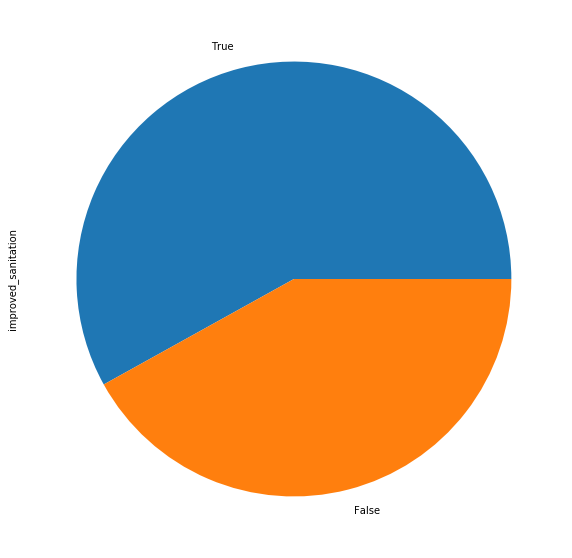

In [43]:
major['improved_sanitation'].value_counts(normalize=True).plot(kind='pie',figsize=(10,10))

# Observations from Improved Sanitation


**1.** About 42% of of the Major Health Centers in Nigeria do not have Improved Sanitation. 


**2.** While about 54.5% of the total Health Centers do not have Improved Sanitation.

# Maternal and Early Childhood Care

In [44]:
#I like to view the Data once again.

nig_nmis.head(10)

,maternal_health_delivery_services,facility_type_display,management,emergency_transport,skilled_birth_attendant,phcn_electricity,c_section_yn,child_health_measles_immun_calc,improved_water_supply,improved_sanitation,...,family_planning_yn,malaria_treatment_artemisinin,num_chews_fulltime,num_nurses_fulltime,num_nursemidwives_fulltime,num_doctors_fulltime,latitude,longitude,geometry,Category
0,True,Health Post,public,True,False,True,False,True,False,False,...,False,True,1.0,0.0,0.0,0.0,6.543408,9.084703,POINT (9.08470312 6.54340807),Minor
1,True,Primary Health Centre,private,True,True,True,False,True,False,True,...,False,True,4.0,1.0,1.0,1.0,9.007209,7.677808,POINT (7.67780798 9.007208609999999),Minor
2,True,Primary Health Centre,public,True,True,True,True,True,True,True,...,True,True,2.0,4.0,11.0,2.0,5.129700,7.159200,POINT (7.1592 5.1297),Minor
3,True,Primary Health Centre,public,False,False,False,False,True,True,False,...,True,True,2.0,0.0,0.0,0.0,5.463300,8.146400,POINT (8.1464 5.4633),Minor
4,True,Health Post,public,False,False,False,False,True,False,False,...,True,True,0.0,0.0,0.0,0.0,5.504000,8.025100,POINT (8.0251 5.504),Minor
5,True,Health Post,private,True,True,False,True,False,True,True,...,True,True,0.0,2.0,0.0,1.0,5.076200,5.871500,POINT (5.8715 5.0762),Minor
6,False,Health Post,public,False,False,False,False,True,False,False,...,True,True,0.0,1.0,0.0,0.0,6.447500,9.049100,POINT (9.049099999999999 6.4475),Minor
7,True,Specialist Hospital,private,True,True,True,True,True,True,True,...,True,True,1.0,6.0,12.0,5.0,5.546000,5.761100,POINT (5.7611 5.546),Major
8,True,Specialist Hospital,private,True,True,True,True,True,True,True,...,True,True,4.0,NaN,4.0,15.0,5.525800,5.765100,POINT (5.7651 5.5258),Major
9,True,Health Post,private,False,False,False,False,False,True,True,...,False,True,1.0,0.0,0.0,0.0,10.285225,8.594392,POINT (8.594391870000001 10.28522539),Minor


In [45]:
nig_nmis.columns

Index(['maternal_health_delivery_services', 'facility_type_display',
       'management', 'emergency_transport', 'skilled_birth_attendant',
       'phcn_electricity', 'c_section_yn', 'child_health_measles_immun_calc',
       'improved_water_supply', 'improved_sanitation',
       'vaccines_fridge_freezer', 'antenatal_care_yn', 'family_planning_yn',
       'malaria_treatment_artemisinin', 'num_chews_fulltime',
       'num_nurses_fulltime', 'num_nursemidwives_fulltime',
       'num_doctors_fulltime', 'latitude', 'longitude', 'geometry',
       'Category'],
      dtype='object')

In [46]:
#Value counts for Maternal Health Delivery Services

nig_nmis['maternal_health_delivery_services'].value_counts()

True     20920
False    12531
Name: maternal_health_delivery_services, dtype: int64

In [49]:
maternal = nig_nmis[['maternal_health_delivery_services','skilled_birth_attendant','child_health_measles_immun_calc','antenatal_care_yn',
                   'family_planning_yn','num_nursemidwives_fulltime']]

maternal.head(10)

,maternal_health_delivery_services,skilled_birth_attendant,child_health_measles_immun_calc,antenatal_care_yn,family_planning_yn,num_nursemidwives_fulltime
0,True,False,True,True,False,0.0
1,True,True,True,True,False,1.0
2,True,True,True,True,True,11.0
3,True,False,True,True,True,0.0
4,True,False,True,True,True,0.0
5,True,True,False,True,True,0.0
6,False,False,True,True,True,0.0
7,True,True,True,True,True,12.0
8,True,True,True,True,True,4.0
9,True,False,False,False,False,0.0


In [56]:
maternal['maternal_health_delivery_services'].value_counts(normalize=True)

True     0.625392
False    0.374608
Name: maternal_health_delivery_services, dtype: float64

In [59]:
maternal_only = maternal[maternal['maternal_health_delivery_services'] == True]

maternal_only['skilled_birth_attendant'].value_counts(normalize=True)

True     0.551114
False    0.448886
Name: skilled_birth_attendant, dtype: float64

In [62]:
maternal['antenatal_care_yn'].value_counts(normalize=True)

True     0.730171
False    0.269829
Name: antenatal_care_yn, dtype: float64

In [68]:
public['antenatal_care_yn'].value_counts(normalize=True)

True     0.693267
False    0.306733
Name: antenatal_care_yn, dtype: float64

In [77]:
maternal['child_health_measles_immun_calc'].value_counts(normalize=True)

True     0.732582
False    0.267418
Name: child_health_measles_immun_calc, dtype: float64

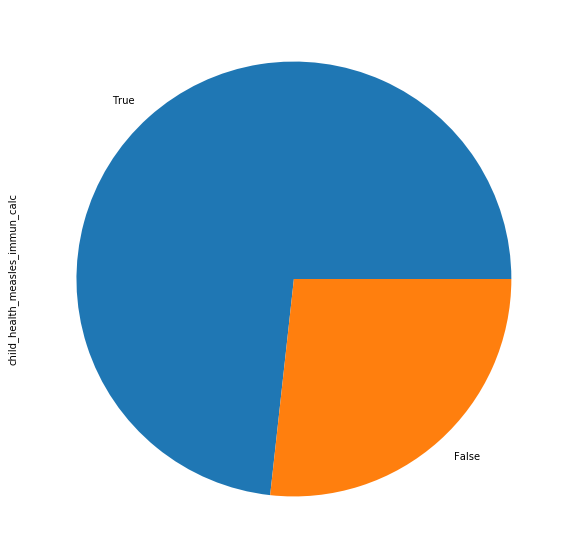

In [76]:
maternal['child_health_measles_immun_calc'].value_counts(normalize=True).plot(kind='pie',figsize=(10,10))

# Observations from Maternal and Early Childhood Care

**1.** Of the total 34139 health Centers in Nigeria, only 20920 (about 62.5% of the total) offer maternal health delivery services. 

**2.** Of the 62.5% health Centers having Maternal Health delivery services, only 55% of this have Skilled Birth Attendant.

**3.** 73% of the Nigerian Health centers have antenantal Care. It is to be noted that 69% of Public health centers have antenantal care.

**4.** 73% of the Nigerian Health centers have Child Health Measles Immunization.

# Malaria Treatment

In [20]:
nig_nmis['malaria_treatment_artemisinin'].value_counts(normalize=True)

True     0.780948
False    0.219052
Name: malaria_treatment_artemisinin, dtype: float64

# Observations from Malaria Treatment

**1.** About 22% of our health Centers do not give Malaria Treatment even though the disease is a risk for 97% of Nigeria's population.